<a href="https://colab.research.google.com/github/believeohiozua/TeamAPS/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fashion-MNIST CNN

## Introduction

#### Dataset Context

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

#### Dataset Content

Every row in both the training and test examples represents an image. Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.

#### Labels

Each training and test example is assigned to one of the following labels:

0. T-shirt/top
1. Trouser
2. Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle boot 

#### Goal

We are going to build a CNN using Keras, with TensorFlow backend, that classifies images into the one of categories shown above. We are also going to run through the main concepts of CNN.

## Packages to Install

You will need to install the following, please follow the links:
    
* [Keras](https://www.pyimagesearch.com/2016/07/18/installing-keras-for-deep-learning/) (you do not need the GPU option)
* [OpenCV](https://www.pyimagesearch.com/2018/09/19/pip-install-opencv/) (make sure to install imutils, this is link covers that)
* [scikit-learn](https://pypi.org/project/scikit-learn/)
* [Matplotlib](https://matplotlib.org/users/installing.html)

## Lets get Started by Importing the Required Packages

In [2]:
# set the matplotlib backend so figures can be saved in the background
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt


# import the keras modules
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras.optimizers import SGD
from keras.datasets import fashion_mnist
from keras.utils import np_utils
from keras import backend as K
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


# othter packages
import numpy as np
import cv2
from imutils import build_montages

Using TensorFlow backend.


## Get the Data

In [3]:
((trainX, trainY), (testX, testY)) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


## Resahpe the Training Data

We have to reshape that it is in the form:
    num_samples x depth x rows x columns

In [0]:
# set image format to channel first
K.set_image_data_format('channels_first')

# reshape data
trainX = trainX.reshape((trainX.shape[0], 1, 28, 28))
testX = testX.reshape((testX.shape[0], 1, 28, 28))

## Scale the Training Data

The maximum value a pixel can take on is 255, therefore to scale the pixels all we have to do is divide each one by 255. 

In [0]:
# scale data to the range of [0, 1]
trainX = trainX.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0

## Reshape the Targets

We need to one-hot-encode the target variable. If you would like to read more about one-hot-encoding follow [this](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f) link. 

In [0]:
trainY = np_utils.to_categorical(trainY, 10)
testY = np_utils.to_categorical(testY, 10)

In [0]:
# initialize the label names (the actual written names)
labelNames = ["top", "trouser", "pullover", "dress", "coat","sandal", "shirt", "sneaker", "bag", "ankle boot"]

## Now We Are Ready to Build Our Model

We are first going to initialise all the tuning parameters we are going to use.

[This](https://www.analyticsvidhya.com/blog/2017/05/25-must-know-terms-concepts-for-beginners-in-deep-learning/) link from the summary slide explains what each parameter. 

#### Initialise tuning parameters

In [0]:
# number of epochs
NUM_EPOCHS = 10
# learning rate
INIT_LR = 1e-2
# batch size
BS = 32
# momentum
MOM = 0.9

#### Initialise the Model Optimizer

In [9]:
# we are going to use stochastic gradient descent as our optimizer
opt = SGD(lr=INIT_LR, momentum=MOM, decay=INIT_LR / NUM_EPOCHS)

Instructions for updating:
Colocations handled automatically by placer.


#### Initialise Model 

In [0]:
# we are using a sequential learning model
model = Sequential()
# our input shape is depth, height, width (in our case 1 sample x 28 pixels x 28 pixels)
inputShape = (1, 28, 28)

## Model Architecture

We are going to use an architecture that consists of 2 overall convolutions (including pooling) and 1 flattening layer. Finally we use a softmax classifier for the output layer as this is a multi-class classification problem. 

In [11]:
# first CONV => RELU => CONV => RELU => POOL layer set
model.add(Conv2D(32, (3, 3), padding="same", input_shape=inputShape))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(32, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# second CONV => RELU => CONV => RELU => POOL layer set
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# first (and only) set of FC => RELU layers
model.add(Flatten())
model.add(Dense(512))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# softmax classifier
model.add(Dense(10))
model.add(Activation("softmax"))

model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


When you can please draw out this architecture and make sure you have a good understadning of what is going on. 

## Train our Model

Using only the training data we are going to train our CCN model. This will take quite a while, so be patient! 

Take note of how the training accuracy increases with every epoch and the loss decreases with every epoch. 

In [12]:
H = model.fit(trainX, trainY, validation_data=(testX, testY), batch_size=BS, epochs=NUM_EPOCHS)

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 34s 564us/step - loss: 0.7652 - acc: 0.7318 - val_loss: 0.4538 - val_acc: 0.8334
Epoch 2/10
60000/60000 [==============================] - 30s 494us/step - loss: 0.4844 - acc: 0.8251 - val_loss: 0.3786 - val_acc: 0.8594
Epoch 3/10
60000/60000 [==============================] - 30s 493us/step - loss: 0.4042 - acc: 0.8535 - val_loss: 0.3317 - val_acc: 0.8765
Epoch 4/10
60000/60000 [==============================] - 29s 491us/step - loss: 0.3640 - acc: 0.8671 - val_loss: 0.3099 - val_acc: 0.8851
Epoch 5/10
60000/60000 [==============================] - 29s 491us/step - loss: 0.3353 - acc: 0.8769 - val_loss: 0.2897 - val_acc: 0.8912
Epoch 6/10
60000/60000 [==============================] - 29s 490us/step - loss: 0.3164 - acc: 0.8849 - val_loss: 0.2782 - val_acc: 0.8968
Epoch 7/10
60000/60000 [==============================] - 29s 490us/

## Get our Test Predictions

In [0]:
# make predictions on the test set
preds = model.predict(testX)

## Compare our Test Predicitons with the Atcual Test Data Values

In [19]:
print(accuracy_score(testY.argmax(axis=1), preds.argmax(axis=1)))

0.9081


The code above shows us that we had an overall test accuray of 90.91%. Which is very good. But lets take a closer looks at the models performance accross each class. 

In [21]:
print(classification_report(testY.argmax(axis=1), preds.argmax(axis=1), target_names=labelNames))

              precision    recall  f1-score   support

         top       0.86      0.86      0.86      1000
     trouser       0.99      0.98      0.99      1000
    pullover       0.86      0.86      0.86      1000
       dress       0.90      0.92      0.91      1000
        coat       0.85      0.82      0.84      1000
      sandal       0.98      0.98      0.98      1000
       shirt       0.73      0.75      0.74      1000
     sneaker       0.95      0.98      0.96      1000
         bag       0.99      0.98      0.98      1000
  ankle boot       0.98      0.96      0.97      1000

   micro avg       0.91      0.91      0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



We can see from above that the model was excellent at classifying almost every class. Every class other than shirts had an f1-score higher than 86%.

[This](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html) link explains precision, recall, and f1-scores. 

However, the table does indicate that the model performed very well. Even a 0.74 f1-score for shirts is a decent result. 

## Plot the  Loss and Accuracy per Epoch

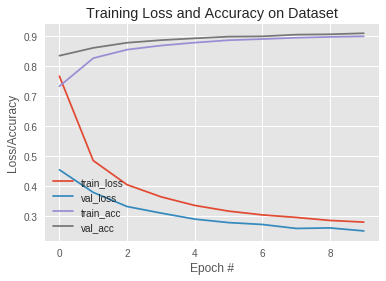

In [22]:
# plot the training loss and accuracy
N = NUM_EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")

The above shows as the number of epochs increases, the training accuracy, and the loss decreases. This is because with every epoch the weights and biases in the model are adjusted to better the accuracy. This is the sole aim of the model. 

It is key to note that training accuracy can be misleading. If a model's training accuracy is much higher its testing accuracy then the model was overfitted to the training data. 

In our case, we can see that our final training accuracy was 0.8968 and the testing accuracy was 0.9091. That indicates that model was not overfit to our training data!

## End of Tutorial

We have successfully built a CNN!

Please play around with the architecture of the model and see if you can increase the overall test accuracy of the model. You should further edit the tuning parameters and test the effects of editing each one. 

Once finished, you can go back to week 6's slides to find out about next week. 